# Kinetic Modelling with COPASI

<a target="_blank" href="https://colab.research.google.com/github/EnzymeML/PyEnzyme/blob/main/examples/KineticModelling.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook demonstrates how to utilize the [COPASI](https://basico.rtfd.io/) library to model kinetic data.

We will use the [abts_reaction.json](./data/abts_reaction.json) EnzymeML document as an example, which describes the oxidation of [ABTS](https://en.wikipedia.org/wiki/ABTS) catalyzed by a [Small Laccase](https://pmc.ncbi.nlm.nih.gov/articles/PMC2280001/).

## What is a Thin Layer?

PyEnzyme provides interfaces to integrate with other kinetic modelling libraries, such as [PySCeS](https://pysces.sourceforge.io/), [COPASI](https://copasi.org/), and [Catalax](https://github.com/JR-1991/catalax).

The thin layer can be understood as a tiny wrapper around the kinetic modelling library, which provides a common interface to PyEnzyme. Hence, every thin layer exposes the same methods, making it easy to switch between different kinetic modelling libraries.

Lets explore the COPASI thin layer in more detail!

In [1]:
#%pip install copasi-basico

In [2]:
import pyenzyme as pe
import matplotlib

matplotlib.use("svg")

# Import the PySCeS thin layer
from pyenzyme.thinlayers import ThinLayerCopasi

In [3]:
# First, load the EnzymeML document
enzmldoc = pe.read_enzymeml("./data/abts_reaction.json")
pe.summary(enzmldoc, interactive=False)

📋 EnzymeML Document Summary

╭─ 📄 Document Overview ──────────────────────────────────────────────────────────────────────────────────────────╮
│ Name: ABTS measurement                                                                                          │
│ Version: 2                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

    📊 Component Counts                                                      
┏━━━━━━━━━━━━━━━━━┳━━━━━━━┓                                                  
┃ Component       ┃ Count ┃                                                  
┡━━━━━━━━━━━━━━━━━╇━━━━━━━┩                                                  
│ Vessels         │     1 │                                                  
│ Proteins        │     2 │                                                  
│ Complexes       │     0 │                                                  
│ Small Molecules │     3 │                                                  
│ Reactions       │     2 │                                                  
│ Measurements    │    24 │                                                  
│ Equations       │     0 │                                                  
│ Parameters      │     3 │                                                  
└─────────────────┴───────┘                                                  
                             🧬 Species Details                              
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Type           ┃ ID              ┃ Name                 ┃ Details         ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Protein        │ slac            │ slac                 │ Vessel: vessel0 │
│ Protein        │ slac_inactive   │ slac_inactive        │ Vessel: vessel0 │
│ Small Molecule │ abts            │ abts                 │ Vessel: vessel0 │
│ Small Molecule │ buffer          │ buffer               │ Vessel: vessel0 │
│ Small Molecule │ abts_radical    │ abts_radical         │ Vessel: vessel0 │
└────────────────┴─────────────────┴──────────────────────┴─────────────────┘

               🧪 Vessels                
┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓
┃ ID      ┃ Name    ┃ Volume ┃ Constant ┃
┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩
│ vessel0 │ vessel0 │ 1.0 l  │    ✓     │
└─────────┴─────────┴────────┴──────────┘

                                    ⚡ Reactions                                     
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ID           ┃ Name                 ┃ Reversible ┃ Reaction Schema                ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ reaction0    │ reaction0            │     ✗      │ abts → abts_radical            │
│ reaction1    │ reaction1            │     ✗      │ slac → slac_inactive           │
└──────────────┴──────────────────────┴────────────┴────────────────────────────────┘

                                📈 Measurements                                 
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ ID                        ┃ Name                 ┃ Species Data ┃ Conditions ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ measurement0              │ measurement0 - A2    │      5       │ —          │
│ measurement1              │ measurement0 - B2    │      5       │ —          │
│ measurement2              │ measurement0 - C2    │      5       │ —          │
│ measurement3              │ measurement1 - A3    │      5       │ —          │
│ measurement4              │ measurement1 - B3    │      5       │ —          │
│ ... +19 more measurements │                      │              │            │
└───────────────────────────┴──────────────────────┴──────────────┴────────────┘

## Thin layer workflow

Every thin layer follows the same workflow:

1. Initialize the thin layer with an EnzymeML document
2. Optimize the model
3. Visualize and/or write the results

The thin layer methods expose the same methods, but the arguments can be different to allow for more flexibility. For instance, when using COPASI, we can specify the optimization method in the `optimize` method. We will use the default method, which is `Levenberg - Marquardt`.

In [4]:
# We are using a temporary directory to store the PySCeS model
tl_copasi = ThinLayerCopasi(enzmldoc=enzmldoc)

# Run the optimization
tl_copasi.optimize()

  SBML	validation	WARNING: Parameter with id 'k_cat' should ideally have a unit defined.
  SBML	validation	WARNING: Parameter with id 'K_M' should ideally have a unit defined.
  SBML	validation	WARNING: Parameter with id 'k_ie' should ideally have a unit defined.


AttributeError: 'ThinLayerCopasi' object has no attribute '_convert_to_pysces_format'

## Collecting and visualizing data

Since all thin layers expose the same interface, inherited from the `BaseThinLayer` class, we can utilize PyEnzyme's functions that accept descendants of the `BaseThinLayer` class. The `pe.plot` function is one such function, which accepts a `thinlayer` argument to integrate a fitted model and visualize the data.

In order to export the data and write the fitted parameters back to the EnzymeML document, we can use the thin layer's `write` method, which will copy the initial document and add the fitted parameters to it. This way, we can keep the original document intact and do something different with it.

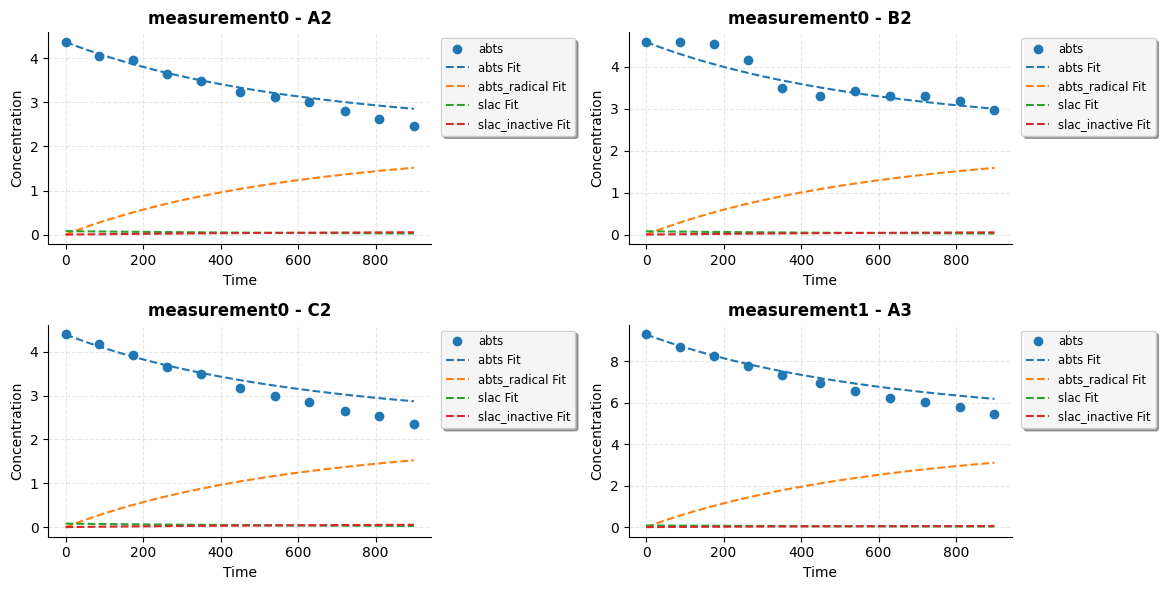

EnzymeML document written to outputs\fitted.json

In [ ]:
# And we can use the new model to visualize the data
f, ax = pe.plot(
    enzmldoc,
    thinlayer=tl_copasi,
    show=True,
    measurement_ids=[
        "measurement0",
        "measurement1",
        "measurement2",
        "measurement3",
    ],
)

# We can now write the fitted parameters back to the EnzymeML document
fitted = tl_copasi.write()
pe.write_enzymeml(fitted, path="outputs/fitted_copasi.json")

In [ ]:
# Due to GitHub's rendering we need to disable the interactive summary
# but locally you can enable it by setting `interactive=True` to make
# use of the interactive widgets.
pe.summary(fitted, interactive=False)

📋 EnzymeML Document Summary

╭─ 📄 Document Overview ──────────────────────────────────────────────────────────────────────────────────────────╮
│ Name: ABTS measurement                                                                                          │
│ Version: 2                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

    📊 Component Counts                                                      
┏━━━━━━━━━━━━━━━━━┳━━━━━━━┓                                                  
┃ Component       ┃ Count ┃                                                  
┡━━━━━━━━━━━━━━━━━╇━━━━━━━┩                                                  
│ Vessels         │     1 │                                                  
│ Proteins        │     2 │                                                  
│ Complexes       │     0 │                                                  
│ Small Molecules │     3 │                                                  
│ Reactions       │     2 │                                                  
│ Measurements    │    24 │                                                  
│ Equations       │     0 │                                                  
│ Parameters      │     3 │                                                  
└─────────────────┴───────┘                                                  
                             🧬 Species Details                              
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Type           ┃ ID              ┃ Name                 ┃ Details         ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Protein        │ slac            │ slac                 │ Vessel: vessel0 │
│ Protein        │ slac_inactive   │ slac_inactive        │ Vessel: vessel0 │
│ Small Molecule │ abts            │ abts                 │ Vessel: vessel0 │
│ Small Molecule │ buffer          │ buffer               │ Vessel: vessel0 │
│ Small Molecule │ abts_radical    │ abts_radical         │ Vessel: vessel0 │
└────────────────┴─────────────────┴──────────────────────┴─────────────────┘

               🧪 Vessels                
┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓
┃ ID      ┃ Name    ┃ Volume ┃ Constant ┃
┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩
│ vessel0 │ vessel0 │ 1.0 l  │    ✓     │
└─────────┴─────────┴────────┴──────────┘

                                    ⚡ Reactions                                     
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ID           ┃ Name                 ┃ Reversible ┃ Reaction Schema                ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ reaction0    │ reaction0            │     ✗      │ abts → abts_radical            │
│ reaction1    │ reaction1            │     ✗      │ slac → slac_inactive           │
└──────────────┴──────────────────────┴────────────┴────────────────────────────────┘

                                📈 Measurements                                 
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ ID                        ┃ Name                 ┃ Species Data ┃ Conditions ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ measurement0              │ measurement0 - A2    │      5       │ —          │
│ measurement1              │ measurement0 - B2    │      5       │ —          │
│ measurement2              │ measurement0 - C2    │      5       │ —          │
│ measurement3              │ measurement1 - A3    │      5       │ —          │
│ measurement4              │ measurement1 - B3    │      5       │ —          │
│ ... +19 more measurements │                      │              │            │
└───────────────────────────┴──────────────────────┴──────────────┴────────────┘

## I want to write my own thin layer!

In order to write your own thin layer, you need to implement the `BaseThinLayer` class. This class provides a common interface to PyEnzyme, which allows you to use the same functions and methods as the built-in thin layers. Once implemented, you can plug it into PyEnzyme's functions and methods.

Your thin layer is something PyEnzyme needs? Feel free to open a pull request!